## Observations and Insights 

In [92]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_dataset = pd.merge(mouse_metadata,study_results,how='left',on='Mouse ID')

# Display the data table for preview
combined_dataset.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [31]:
# Checking the number of mice.
unique_mice = combined_dataset['Mouse ID'].value_counts().count()
print("number of mice : " , unique_mice)

number of mice :  249


In [46]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_dataset[combined_dataset.duplicated (['Mouse ID','Timepoint'])]
duplicate_mice.head(20)
duplicate_mice.

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [67]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#find duplicate Mouse ID from duplicate dataset
duplicate_mouse = duplicate_mice['Mouse ID']
#store duplicate mouse id
duplicate_mouse_id = duplicate_mouse.iloc[0]
duplicate_mouse_id
#set mouse ID as index
combined_dataset_final = combined_dataset.set_index('Mouse ID')
combined_dataset_final.head(20)
#drop duplicate id from dataset
clean_dataset = combined_dataset_final.drop(index=duplicate_mouse_id)
clean_dataset.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [66]:
# Checking the number of mice in the clean DataFrame.
clean_dataset.count()

Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [71]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen_grouped = clean_dataset.groupby("Drug Regimen")
drug_regimen_grouped.head(20)
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
tumor_volume_mean = drug_regimen_grouped["Tumor Volume (mm3)"].mean()
tumor_volume_median = drug_regimen_grouped["Tumor Volume (mm3)"].median()
tumor_volume_variance = drug_regimen_grouped["Tumor Volume (mm3)"].var()
tumor_volume_standard_dev = drug_regimen_grouped["Tumor Volume (mm3)"].std()
tumor_volume_sem = drug_regimen_grouped["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.
summary_stats = pd.DataFrame({"Tumor Volume Mean":tumor_volume_mean,
                             "Tumor Volume Median":tumor_volume_median,
                             "Tumor Volume Variance":tumor_volume_variance,
                             "Tumor Volume Standard Devivation":tumor_volume_standard_dev,
                             "Tumor Volume SEM":tumor_volume_sem})
summary_stats.head(20)

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Devivation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

<AxesSubplot:title={'center':'Total number of timepoints for all mice'}, xlabel='Drug Regimen', ylabel='Total Mice used'>

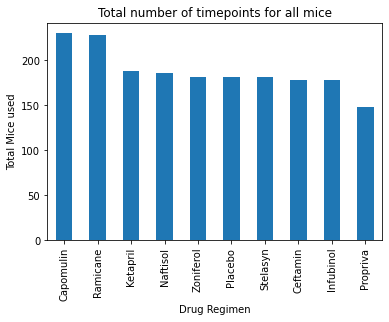

In [88]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

grouped_data = clean_dataset.groupby(["Drug Regimen"])['Timepoint'].count()
grouped_data.head()
grouped_data.sort_values(ascending=True)
grouped_data.sort_values(ascending=False).plot(kind='bar',title='Total number of timepoints for all mice',ylabel='Total Mice used',xlabel='Drug Regimen')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Capomulin'),
  Text(1, 0, 'Ramicane'),
  Text(2, 0, 'Ketapril'),
  Text(3, 0, 'Naftisol'),
  Text(4, 0, 'Zoniferol'),
  Text(5, 0, 'Placebo'),
  Text(6, 0, 'Stelasyn'),
  Text(7, 0, 'Infubinol'),
  Text(8, 0, 'Ceftamin'),
  Text(9, 0, 'Propriva')])

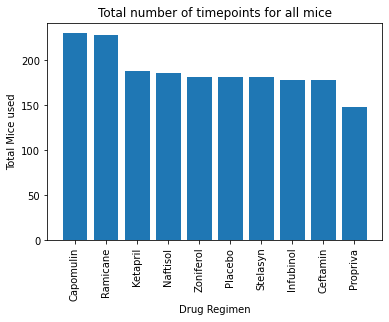

In [103]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_regimen_count = clean_dataset["Drug Regimen"].value_counts()
drug_regimen_count
x_axis = np.arange(len(drug_regimen_count))
plt.bar(x_axis,drug_regimen_count)
plt.title('Total number of timepoints for all mice')
plt.xlabel('Drug Regimen')
plt.ylabel('Total Mice used')
#x_axis
#drug_regimen_count.index.values
plt.xticks(x_axis,drug_regimen_count.index.values)
#rotate x-axis labels.
plt.xticks(rotation=90)

<AxesSubplot:ylabel='distribution of female versus male'>

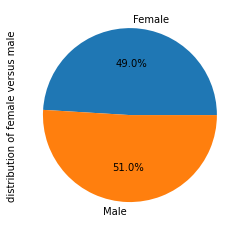

In [111]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_grouped_gender = clean_dataset.groupby(["Sex"])['Drug Regimen'].count()
mice_grouped_gender.plot(kind='pie',ylabel='Distribution of female versus male',autopct="%1.1f%%")

Text(0.5, 1.0, 'Distribution of female versus male')

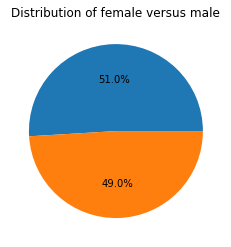

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_count = clean_dataset["Sex"].value_counts()
labels = clean_dataset["Sex"].value_counts()
plt.pie(gender_count,autopct="%1.1f%%")
plt.title('Distribution of female versus male')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
